In [1]:
import numpy as np
import pandas as pd
import pmdarima as pm

In [29]:
data=pd.read_csv(r'Dataset/Microsoft_Stock.csv')
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [30]:
var1=data['Close'].resample('M').mean()

In [31]:
context_window=36
forecast_horizon=12
train_size=int(0.8*len(var1))

In [32]:
train_data=var1[:train_size]
test_data=var1[:-train_size]
test_data.shape

(15,)

In [48]:
arima_model=pm.auto_arima(train_data.values,start_p=1,start_q=1,max_p=5,max_q=5,seasonal=False)


In [60]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -139.739
Date:                Sun, 18 Aug 2024   AIC                            281.478
Time:                        11:44:40   BIC                            283.486
Sample:                             0   HQIC                           282.254
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.4267      1.655      5.695      0.000       6.182      12.671
===================================================================================
Ljung-Box (L1) (Q):                   2.76   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.10   Prob(JB):                         0.73
Heteroskedasticity (H):               1.30   Skew:                            -0.19
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

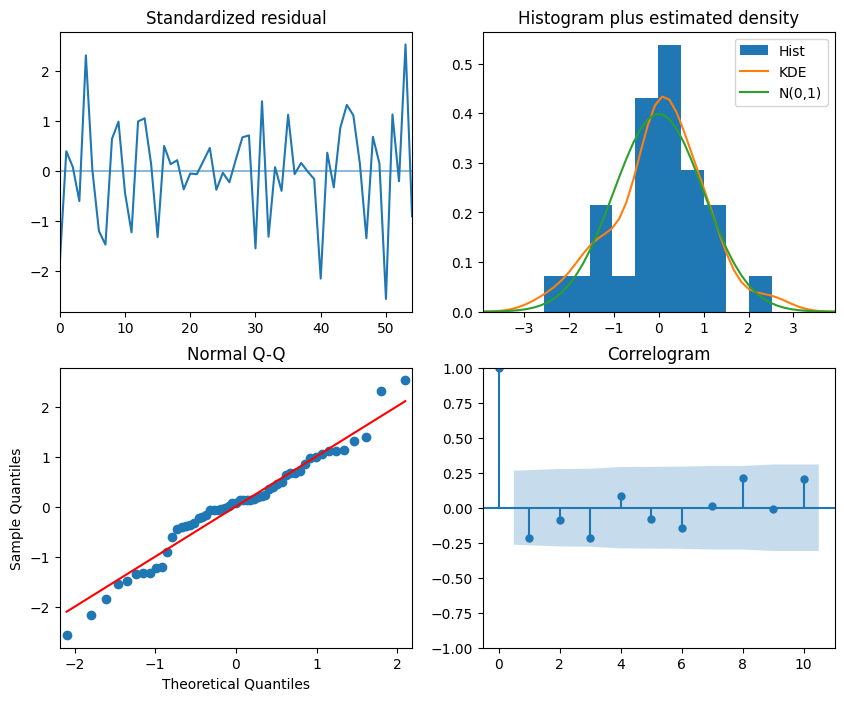

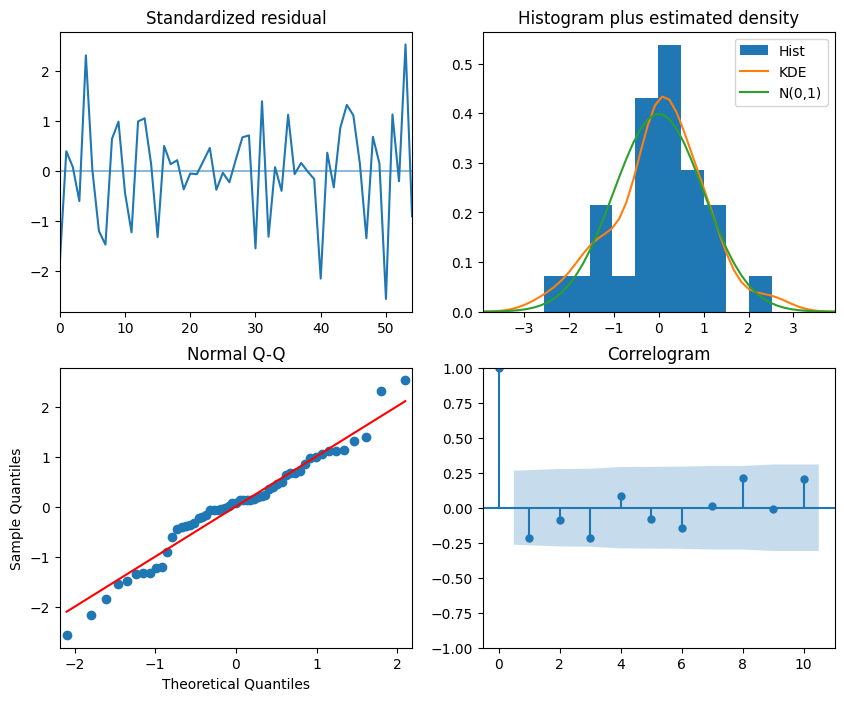

In [61]:
arima_model.plot_diagnostics(figsize=(10, 8))


In [62]:
forecast, conf_int = arima_model.predict(n_periods=15, return_conf_int=True)

# Convert forecast to a DataFrame for better visualization
forecast_index = pd.date_range(start=test_data.index[0], periods=15, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])


In [64]:
forecast_df

,Forecast
2015-04-30,160.300690
2015-05-31,166.403286
2015-06-30,172.505881
2015-07-31,178.608476
2015-08-31,184.711071
2015-09-30,190.813667
2015-10-31,196.916262
2015-11-30,203.018857
2015-12-31,209.121452
2016-01-31,215.224048


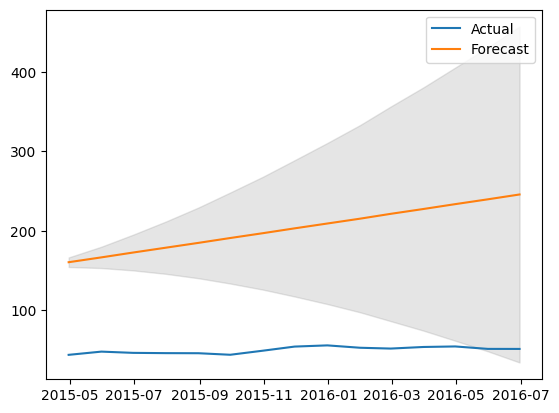

In [63]:
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data, label='Actual')
plt.plot(forecast_df.index, forecast_df, label='Forecast')
plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.show()
